In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from analysis import Subject, logger
from analysis.consts import TIME_WINDOW, TRIAL_DURATION
from analysis.postprocess import calc_mean_trans_nb

logger.setLevel("INFO")

In [2]:
timer_subj_roots = []
control_subj_roots = []

results_root = Path("./results/subjects")
for root in results_root.glob("trial_*"):
    if root.name.endswith("timer"):
        timer_subj_roots.append(root)
    else:
        control_subj_roots.append(root)


In [3]:
indeces = []
trans_list = []
for path in timer_subj_roots:
    subj = Subject(path)
    indeces.append(subj.name)
    mean_trans_nb = calc_mean_trans_nb(subj)
    trans_list.append(mean_trans_nb)

timer_df = pd.DataFrame(trans_list, index=indeces)
timer_df.columns = [
    f"{i}[s]-{i+TIME_WINDOW}[s]" for i in range(0, TRIAL_DURATION, TIME_WINDOW)
]

In [4]:
indeces = []
trans_list = []
for path in control_subj_roots:
    subj = Subject(path)
    indeces.append(subj.name)
    mean_trans_nb = calc_mean_trans_nb(subj)
    trans_list.append(mean_trans_nb)

control_df = pd.DataFrame(trans_list, index=indeces)
control_df.columns = [
    f"{i}[s]-{i+TIME_WINDOW}[s]" for i in range(0, TRIAL_DURATION, TIME_WINDOW)
]

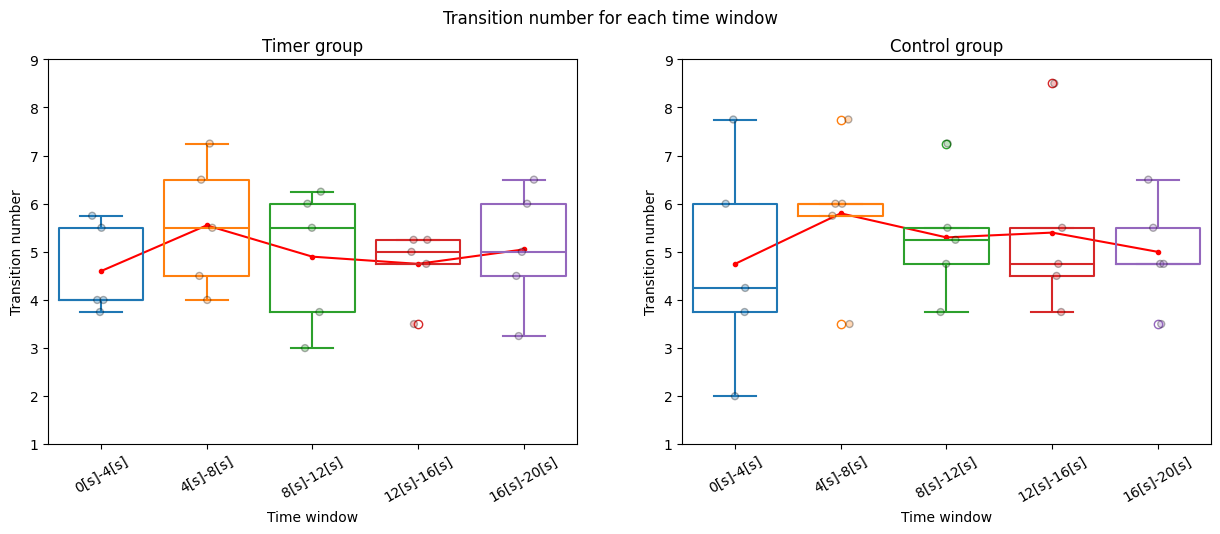

In [9]:
def plot(df, ax):
    ax.plot(df.mean(), color="red", marker=".", label="trend")
    sns.boxplot(df, fill=False, ax=ax)
    sns.stripplot(
        df,
        size=5,
        edgecolor="black",
        linewidth=1,
        alpha=0.3,
        ax=ax,
    )


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Transition number for each time window")
plot(timer_df, axes[0])
axes[0].set_title("Timer group")
plot(control_df, axes[1])
axes[1].set_title("Control group")

for ax in axes:
    ax.set_xlabel("Time window")
    ax.set_ylabel("Transition number")
    # ax.set_ylim(4.2, 6.2)
    ax.set_ylim(1, 9)
    ax.tick_params(axis="x", labelrotation=30)

plt.show()